### Import necessary libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import glob

### Read all the file names

In [31]:
brazil=glob.glob('Brazil/*.jpg')
france=glob.glob('France/*.jpg')
portugal=glob.glob('Portugal/*.jpg')
argentina=glob.glob('Argentina/*.jpg')

In [33]:
print(len(brazil))

150


In [35]:
print(len(france))

150


In [37]:
print(len(portugal))

150


In [39]:
print(len(argentina))

150


### Read image data from all files and store it in a variable, Store the label as well

In [42]:
image = []
label = []

for i in brazil:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in france:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in portugal:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in argentina:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

### Plot some of the images

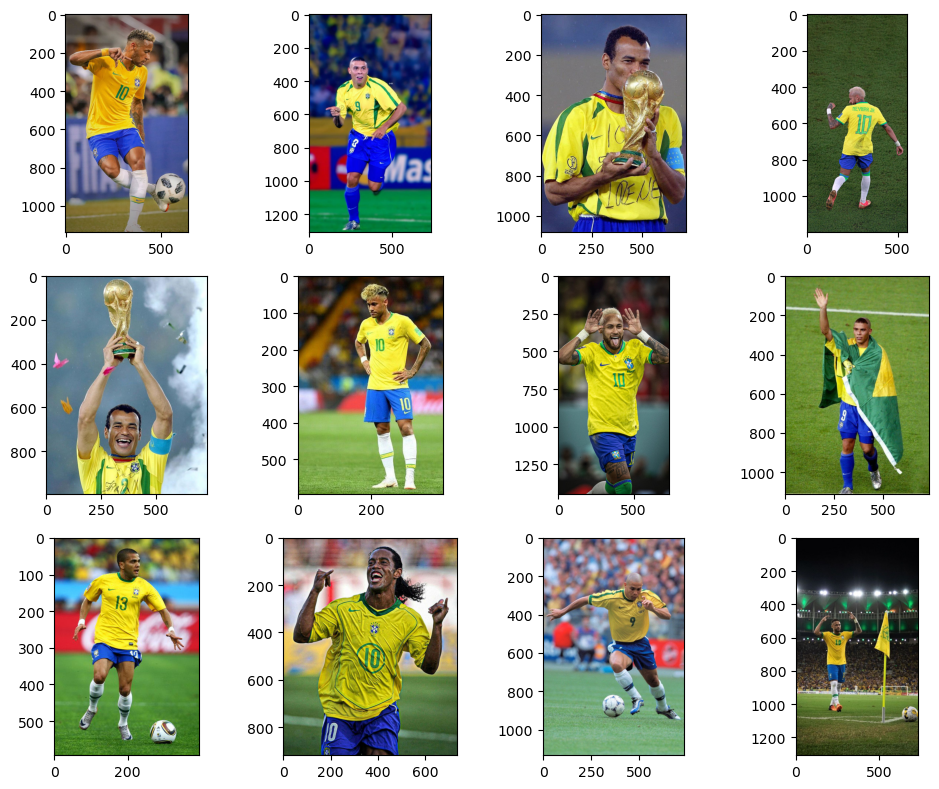

In [45]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

In [47]:
names={0:brazil,1:france,2:portugal,3:argentina}

### Shuffle images and labels

In [50]:
from sklearn.utils import shuffle

In [52]:
image, label = shuffle(image, label)

### Plot the images once again

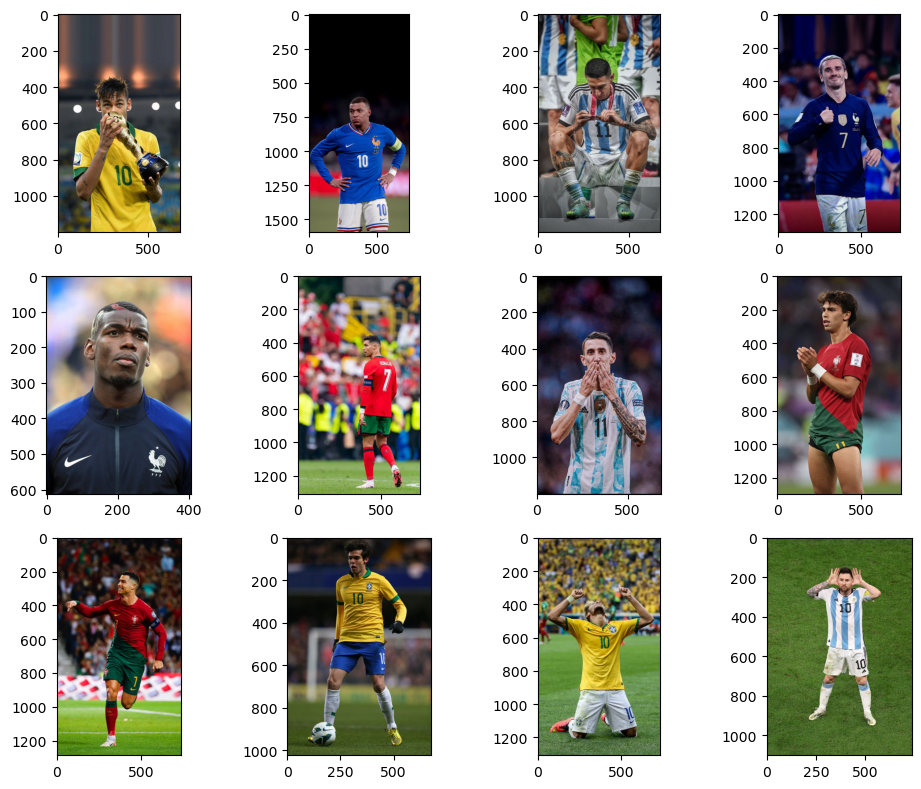

In [55]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    #plt.title(names[label[i]])
plt.tight_layout()


### Check the shape of some of the images¶

In [58]:
for i in range(10):
    print(image[i].shape)

(1200, 676, 3)
(1593, 736, 3)
(1200, 675, 3)
(1308, 736, 3)
(612, 408, 3)
(1308, 736, 3)
(1200, 686, 3)
(1294, 736, 3)
(1288, 736, 3)
(1024, 675, 3)


As you can see, the geometry of each of the images vary. We have to resize all the image to have the same dimensions

### Resize all the images to a same height and width

In [62]:
from skimage.transform import resize

In [70]:
X = []

for i in image:
    X.append(resize(i, (300,300,3)))

### Convert images and labels to numpy array and store them as X and y variables

In [73]:
X = np.array(X)

In [75]:
y = np.array(label)

### Reshape the images to 1 dimension¶

In [78]:
d1, d2, d3, d4 = X.shape

In [80]:
X = X.reshape((d1, d2*d3*d4))

### Train test Split

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Create SVM Model and train it

In [88]:
from sklearn.svm import SVC

In [90]:
model = SVC()

In [92]:
 model.fit(X_train, y_train)

SVC()

### Make predictions with X_test


In [94]:
 y_pred = model.predict(X_test)

### Evaluate the mode

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [99]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [101]:
import seaborn as sns

<Axes: >

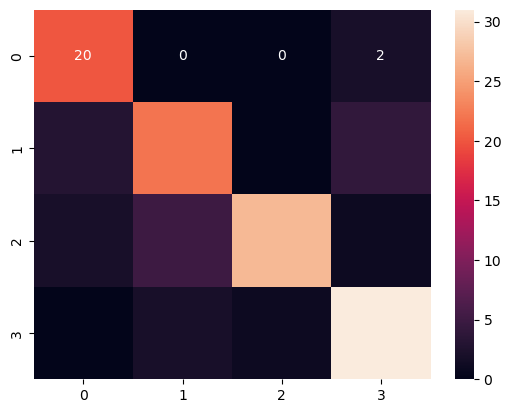

In [103]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)

### Show some images

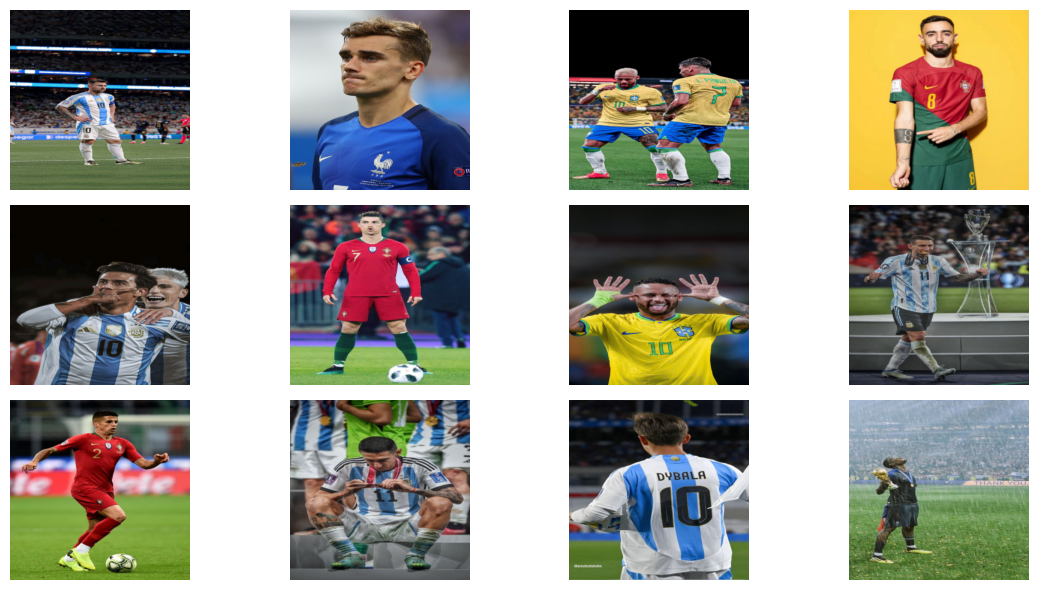

In [112]:
X_test_images = X_test.reshape((-1, 300, 300, 3))

plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test_images[i])
    #plt.title(f"Pred: {names[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()